In [51]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import xarray as xr
import numpy as np
import pandas as pd
import glob
import calendar
import seaborn as sns
import seaborn_image as isns

In [52]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature

In [53]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [54]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [55]:
data_baseline = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_baseline_2.6_cropped.nc')

In [56]:
data_oae = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/mld&sst&swt/wind speed/wind_oae_2.6_cropped.nc')

In [57]:
dataframe_base = data_baseline.sel(time_counter=slice('2090', '2100'))

In [58]:
dataframe_oae = data_oae.sel(time_counter=slice('2090', '2100'))

### Map of EU Seasonal Average of Wind without OAE

In [59]:
month_length = dataframe_base.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (dataframe_base * weights).groupby("time_counter.season").sum(dim="time_counter")

In [60]:
ds_weighted_baseline = ds_weighted_baseline.where(ds_weighted_baseline)

In [61]:
ds_unweighted_baseline = dataframe_base.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [ ]:
baseline_djf = (ds_weighted_baseline.wind.isel(season=0)).to_dataset(name='wind')
baseline_jja = (ds_weighted_baseline.wind.isel(season=1)).to_dataset(name='wind')
baseline_mam = (ds_weighted_baseline.wind.isel(season=2)).to_dataset(name='wind')
baseline_son = (ds_weighted_baseline.wind.isel(season=3)).to_dataset(name='wind')

### Map of EU Seasonal Average of Wind with OAE

In [ ]:
month_length = dataframe_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (dataframe_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [ ]:
ds_weighted_oae = ds_weighted_oae.where(ds_weighted_oae)

In [ ]:
ds_unweighted_oae = dataframe_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

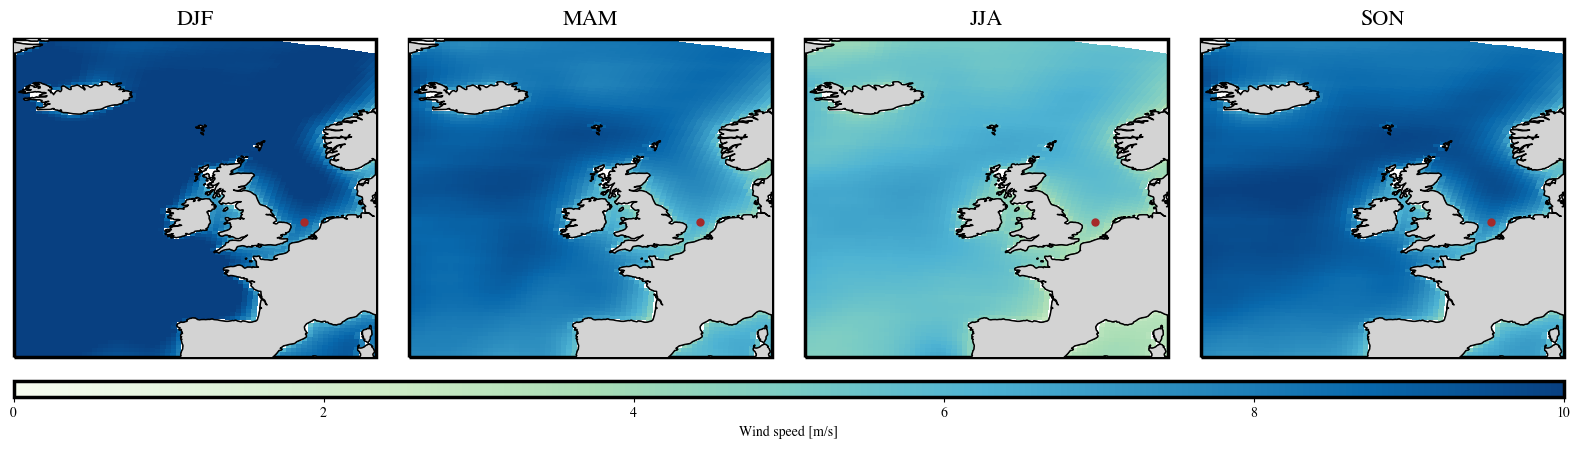

In [131]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(20, 8))
plt.subplots_adjust(wspace=0.09, hspace=0.05)

im0 = baseline_djf.wind.plot.pcolormesh(
        ax=ax0, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=10,
        cmap="GnBu",
        add_colorbar=False
    )

im1 = baseline_mam.wind.plot.pcolormesh(
        ax=ax1, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=10,
        cmap="GnBu",
        add_colorbar=False
    )
    
im2 = baseline_jja.wind.plot.pcolormesh(
        ax=ax2, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=10,
        cmap="GnBu",
        add_colorbar=False
    )
    
im3 = baseline_son.wind.plot.pcolormesh( 
        ax=ax3, x="nav_lon", y="nav_lat",
        vmin=0,
        vmax=10,
        cmap="GnBu",
        add_colorbar=False
    )

axes = [ax0, ax1, ax2, ax3]

for ax in axes:
    ax.coastlines()
    ax.set_extent([-25, 10, 40, 70])
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey', edgecolor='black')
    ax.plot(3, 53, "o", color='brown', markersize=5)

for ax in axes: 
    if ax == ax0:
        ax.set_title("DJF", fontsize=16, y=1.02),
    elif ax == ax1:
        ax.set_title("MAM", fontsize=16, y=1.02),
    elif ax == ax2:
        ax.set_title("JJA", fontsize=16, y=1.02),
    else:
        ax.set_title("SON", fontsize=16, y=1.02)    

font_size = 10
        
cbar = plt.colorbar(im1, ax = axes, aspect =100, pad=0.04, location='bottom')
cbar.set_label('Wind speed [m/s]', fontsize=10)
cbar.ax.tick_params(labelsize=font_size)

pass

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/SSP1_2.6/sst&mld&swt&wind/windspeed.png')